<a href="https://colab.research.google.com/github/yashi4/Gold-price-prediction/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn matplotlib yfinance


In [2]:
import yfinance as yf

# Downloading gold price data (GC=F is the symbol for gold futures)
data = yf.download('GC=F', start='2010-01-01', end='2024-01-01')

# Previewing the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  1117.699951  1122.300049  1097.099976  1117.699951  1117.699951   
2010-01-05  1118.099976  1126.500000  1115.000000  1118.099976  1118.099976   
2010-01-06  1135.900024  1139.199951  1120.699951  1135.900024  1135.900024   
2010-01-07  1133.099976  1133.099976  1129.199951  1133.099976  1133.099976   
2010-01-08  1138.199951  1138.199951  1122.699951  1138.199951  1138.199951   

            Volume  
Date                
2010-01-04     184  
2010-01-05      53  
2010-01-06     363  
2010-01-07      56  
2010-01-08      54  


In [3]:
import pandas as pd
import numpy as np

# Handling missing values (fill with previous day's value)
data = data.fillna(method='ffill')

# Creating features (using date and lagged prices as features)
data['Prev_Close'] = data['Adj Close'].shift(1)
data = data.dropna()

# Selecting features and target
X = data[['Prev_Close']]  # Previous day price as feature
y = data['Adj Close']  # Today's price as target


<ipython-input-3-f92f22a01668>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [4]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}")


Linear Regression - MAE: 10.336944046196267, RMSE: 14.765923216293915


In [6]:
from sklearn.svm import SVR

# Initialize and fit the SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))

print(f"SVM - MAE: {mae_svm}, RMSE: {rmse_svm}")


SVM - MAE: 10.52353217311552, RMSE: 14.883688632536183


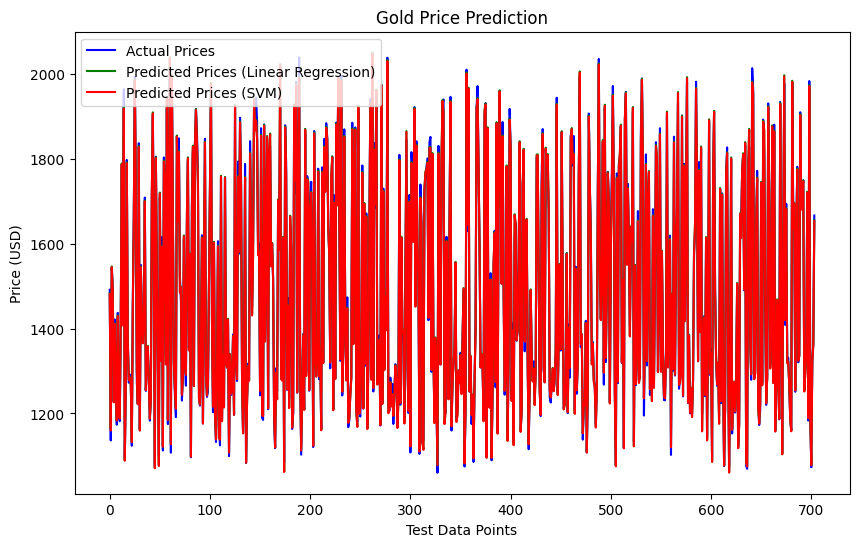

In [7]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Prices', color='b')
plt.plot(y_pred_lr, label='Predicted Prices (Linear Regression)', color='g')
plt.plot(y_pred_svm, label='Predicted Prices (SVM)', color='r')
plt.legend()
plt.title("Gold Price Prediction")
plt.xlabel("Test Data Points")
plt.ylabel("Price (USD)")
plt.show()
